### Problem Statement
For any organization, even the slightest chance of financial risk can not be ignored.
Organizations conduct regular inspections on their expenditures and revenue to make sure that
they do not fall below the critical limit. In this assignment, you as a data scientist must use the
given data to predict whether an organization is under a possible financial risk or not.

Given are 7 distinguishing factors that can provide insight into whether an organization may face
a financial risk or not. Your objective as a data scientist is to build a machine learning model that
can predict if an organization will fall under the risk using the given features.

**Data Link:** https://www.kaggle.com/datasets/manukulamkombil/machinehack-financial-risk-prediction

### Task

1. EDA and preprocessing
2. Dense Neural Network model (3 hidden layers, and 1 output neuron with sigmoid activation)
3. Fit dropout layer with Early stopping, use SGD optimizer and binary cross-entropy
4. AUC-ROC score for above DNN on a test set
5. Dense Neural Network model (2 output neurons and softmax activation)
6. Log loss score for above DNN on a test set

### Importing libraries

In [1]:
#Data preprocessing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

#Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from keras.callbacks import EarlyStopping

#Evaluation 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Understanding data

In [2]:
train = pd.read_csv(r"Train.csv")

In [3]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [4]:
train.shape

(543, 8)

In [36]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [6]:
train.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

### EDA

#### Univariate Analysis 

In [7]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


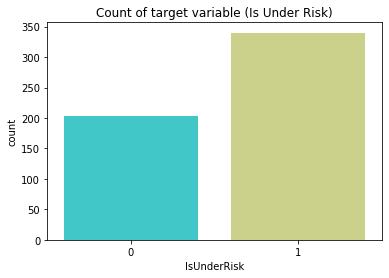

In [8]:
sns.countplot(train['IsUnderRisk'], palette = 'rainbow')
plt.title('Count of target variable (Is Under Risk)')
plt.show()

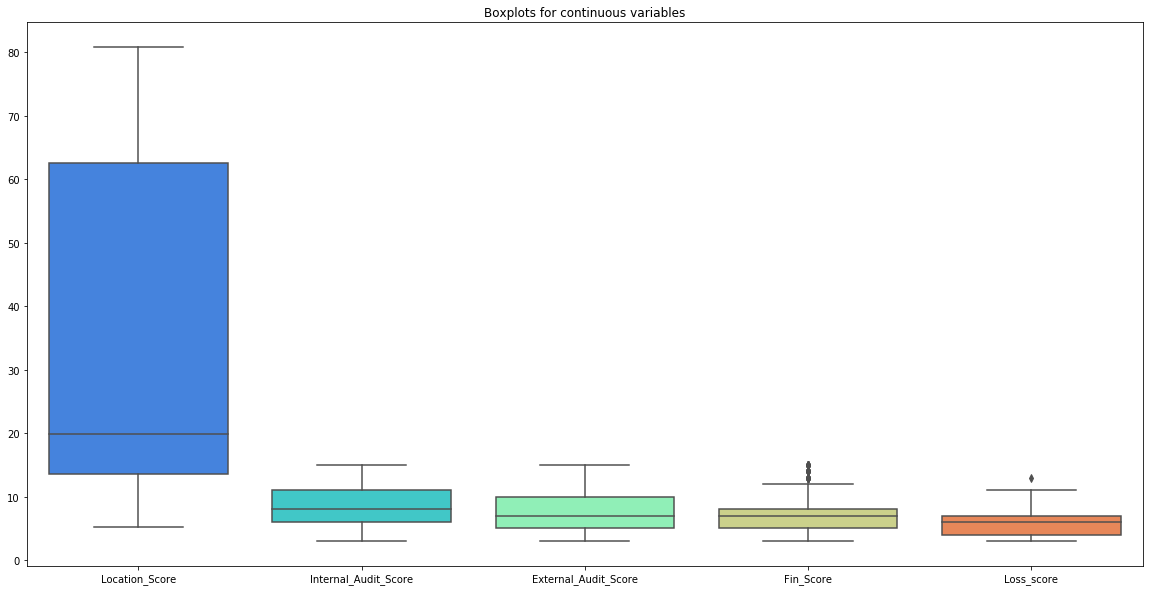

In [9]:
cont_var = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']

plt.figure(figsize = (20,10))
sns.boxplot(data= train[cont_var], palette = 'rainbow')
plt.title('Boxplots for continuous variables')
plt.show()

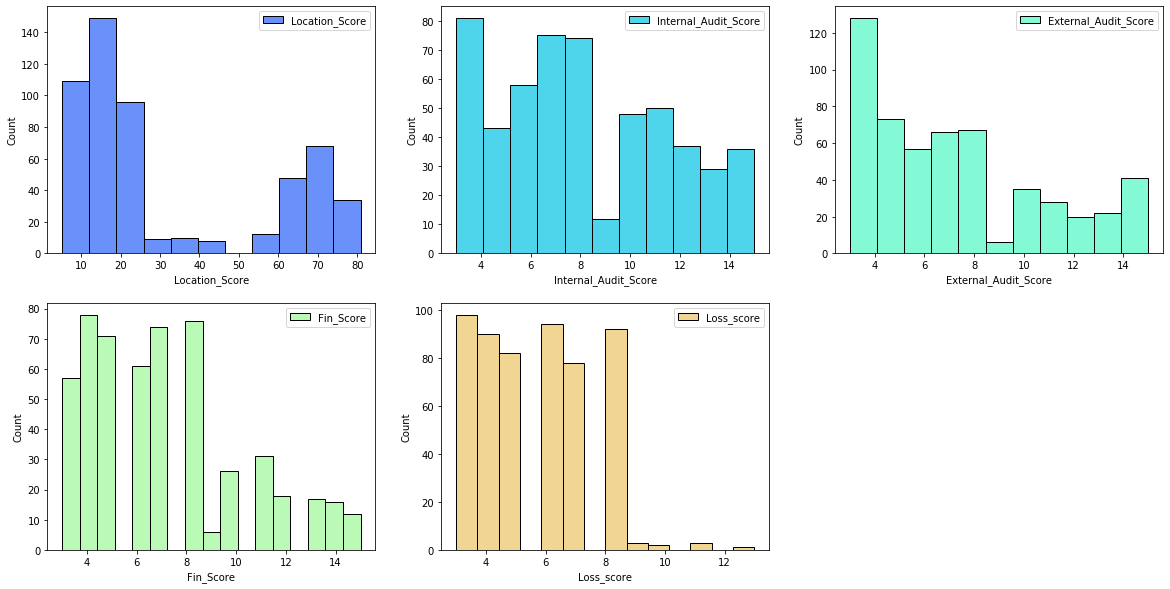

In [10]:
clr = sns.color_palette("rainbow")

plt.figure(figsize=(20,10))
for i,j in zip(range(1,6),cont_var):
    plt.subplot(2,3,i)
    sns.histplot(train[j], label=j, color=clr[i-1])
    plt.legend()
    plt.plot()

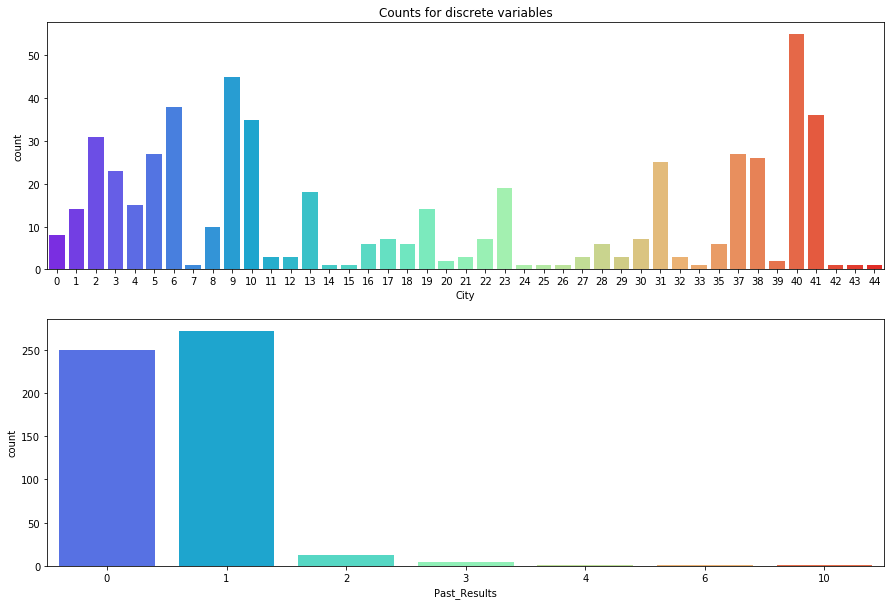

In [11]:
discrete_var = ['City', 'Past_Results']

plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.countplot(train[discrete_var[0]], palette = 'rainbow')
plt.title('Counts for discrete variables')

plt.subplot(2,1,2)
sns.countplot(train[discrete_var[1]], palette = 'rainbow')

plt.show()

#### Bivariate Analysis

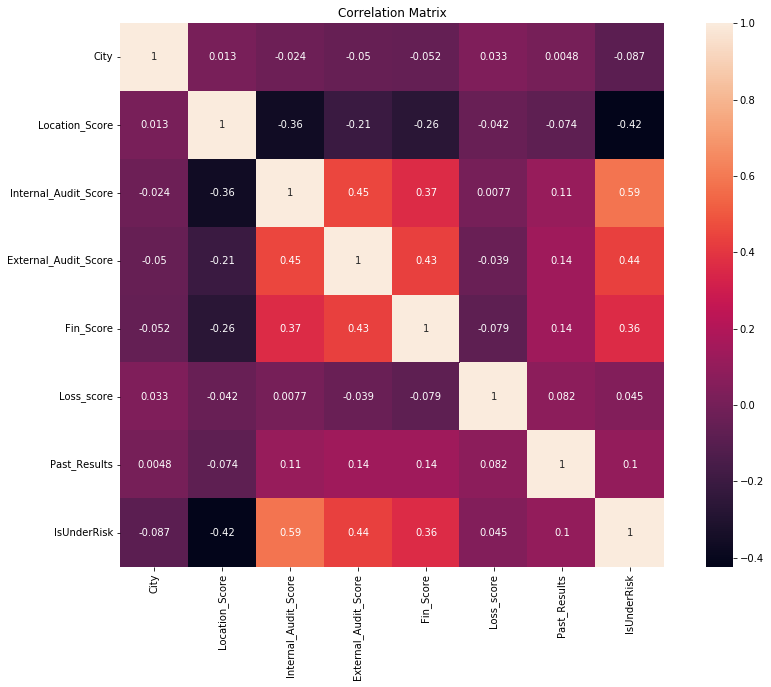

In [12]:
corr = train.corr()

plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True, square=True)
plt.title('Correlation Matrix')
plt.show()

### Separating target variable 

In [13]:
X = train.drop(['IsUnderRisk'], axis=1)
y = pd.Series(train['IsUnderRisk'])

### Normalizing Data

In [14]:
scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)

### Splitting into train & test 

In [15]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.20)

## Building DNN Model (1)

In [16]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(7,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=2)

In [19]:
history1 = model.fit(x=x_train, y=y_train, epochs=200, validation_data=(x_test, y_test), callbacks=[early_stop])

Train on 434 samples, validate on 109 samples
Epoch 1/200
434/434 [==============================] - 1s 1ms/sample - loss: 0.7002 - accuracy: 0.3986 - val_loss: 0.6941 - val_accuracy: 0.4495
Epoch 2/200
434/434 [==============================] - 0s 90us/sample - loss: 0.6918 - accuracy: 0.5392 - val_loss: 0.6867 - val_accuracy: 0.6147
Epoch 3/200
434/434 [==============================] - 0s 93us/sample - loss: 0.6859 - accuracy: 0.6175 - val_loss: 0.6805 - val_accuracy: 0.6330
Epoch 4/200
434/434 [==============================] - 0s 86us/sample - loss: 0.6799 - accuracy: 0.6336 - val_loss: 0.6746 - val_accuracy: 0.6330
Epoch 5/200
434/434 [==============================] - 0s 101us/sample - loss: 0.6746 - accuracy: 0.6267 - val_loss: 0.6698 - val_accuracy: 0.6330
Epoch 6/200
434/434 [==============================] - 0s 93us/sample - loss: 0.6705 - accuracy: 0.6267 - val_loss: 0.6656 - val_accuracy: 0.6330
Epoch 7/200
434/434 [==============================] - 0s 92us/sample - loss: 

434/434 [==============================] - 0s 92us/sample - loss: 0.4419 - accuracy: 0.7972 - val_loss: 0.4850 - val_accuracy: 0.7248
Epoch 57/200
434/434 [==============================] - 0s 92us/sample - loss: 0.4394 - accuracy: 0.8203 - val_loss: 0.4822 - val_accuracy: 0.7339
Epoch 58/200
434/434 [==============================] - 0s 84us/sample - loss: 0.4323 - accuracy: 0.8134 - val_loss: 0.4796 - val_accuracy: 0.7431
Epoch 59/200
434/434 [==============================] - 0s 92us/sample - loss: 0.4308 - accuracy: 0.8065 - val_loss: 0.4774 - val_accuracy: 0.7615
Epoch 60/200
434/434 [==============================] - 0s 93us/sample - loss: 0.4258 - accuracy: 0.8088 - val_loss: 0.4753 - val_accuracy: 0.7615
Epoch 61/200
434/434 [==============================] - 0s 96us/sample - loss: 0.4222 - accuracy: 0.8111 - val_loss: 0.4734 - val_accuracy: 0.7798
Epoch 62/200
434/434 [==============================] - 0s 92us/sample - loss: 0.4152 - accuracy: 0.8134 - val_loss: 0.4716 - val_a

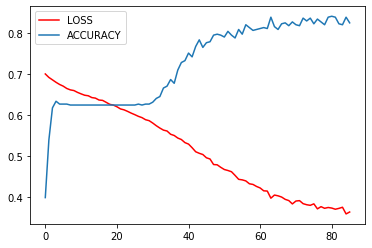

In [20]:
plt.plot(history1.history['loss'], label="LOSS", color = "red")
plt.plot(history1.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

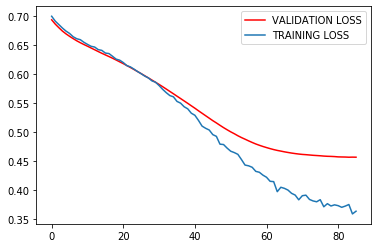

In [21]:
plt.plot(history1.history['val_loss'], label="VALIDATION LOSS",color = "red")
plt.plot(history1.history['loss'], label="TRAINING LOSS")
plt.legend(loc='best')
plt.show()

### Predicting on test set 

In [22]:
y_pred_prob = model.predict(x_test)

In [23]:
y_pred = np.argmax(y_pred_prob, axis=1)

In [24]:
print(confusion_matrix(y_test, y_pred))

[[40  0]
 [69  0]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54        40
           1       0.00      0.00      0.00        69

    accuracy                           0.37       109
   macro avg       0.18      0.50      0.27       109
weighted avg       0.13      0.37      0.20       109



### ROC-AUC Score

In [26]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score for the DNN model-1 is", np.round(roc_auc,2))

ROC-AUC Score for the DNN model-1 is 0.5


### One-Hot Encoding target variable 

In [27]:
y_ = np.array(train['IsUnderRisk']).reshape(-1,1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [28]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.20)

## DNN Model (2)

In [29]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(7,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [30]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
history2 = model.fit(x=x_train, y=y_train, epochs=100)

Train on 434 samples
Epoch 1/100
434/434 [==============================] - 0s 1ms/sample - loss: 0.6795 - accuracy: 0.6521
Epoch 2/100
434/434 [==============================] - 0s 56us/sample - loss: 0.6575 - accuracy: 0.7488
Epoch 3/100
434/434 [==============================] - 0s 59us/sample - loss: 0.6410 - accuracy: 0.7442
Epoch 4/100
434/434 [==============================] - 0s 61us/sample - loss: 0.6271 - accuracy: 0.7488
Epoch 5/100
434/434 [==============================] - 0s 64us/sample - loss: 0.6149 - accuracy: 0.7673
Epoch 6/100
434/434 [==============================] - 0s 46us/sample - loss: 0.6030 - accuracy: 0.7627
Epoch 7/100
434/434 [==============================] - 0s 70us/sample - loss: 0.5921 - accuracy: 0.7650
Epoch 8/100
434/434 [==============================] - 0s 59us/sample - loss: 0.5816 - accuracy: 0.7488
Epoch 9/100
434/434 [==============================] - 0s 53us/sample - loss: 0.5713 - accuracy: 0.7719
Epoch 10/100
434/434 [======================

434/434 [==============================] - 0s 69us/sample - loss: 0.3508 - accuracy: 0.8203
Epoch 79/100
434/434 [==============================] - 0s 46us/sample - loss: 0.3511 - accuracy: 0.8180
Epoch 80/100
434/434 [==============================] - 0s 69us/sample - loss: 0.3497 - accuracy: 0.8157
Epoch 81/100
434/434 [==============================] - 0s 41us/sample - loss: 0.3497 - accuracy: 0.8203
Epoch 82/100
434/434 [==============================] - 0s 68us/sample - loss: 0.3495 - accuracy: 0.8157
Epoch 83/100
434/434 [==============================] - 0s 46us/sample - loss: 0.3483 - accuracy: 0.8134
Epoch 84/100
434/434 [==============================] - 0s 71us/sample - loss: 0.3475 - accuracy: 0.8249
Epoch 85/100
434/434 [==============================] - 0s 50us/sample - loss: 0.3475 - accuracy: 0.8134
Epoch 86/100
434/434 [==============================] - 0s 64us/sample - loss: 0.3474 - accuracy: 0.8134
Epoch 87/100
434/434 [==============================] - 0s 51us/samp

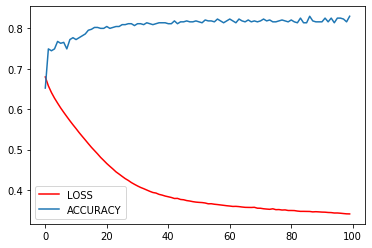

In [32]:
plt.plot(range(100), history2.history['loss'], label="LOSS", color = "red")
plt.plot(range(100), history2.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

### Predicting on test set

In [33]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

### Log-loss Error for Model 2

In [35]:
lgls = log_loss(y_test, y_pred_prob)
print("Log-Loss Error for the DNN model-2 is", np.round(lgls,2))

Log-Loss Error for the DNN model-2 is 0.37
